# **Music Recommendation System**

## Research Question:

Most song recommendation system proposes next track based on popularity and number of hits on the song track. However, there could be some song tracks that couldn't gain popularity so far but align with the features of song being liked by the listener.

## Dataset:

https://www.kaggle.com/datasets/maxkuz/spotify-electronic-music-datasetLinks to an external site.

## Expected Result:

Based on the analysis, the algorithm calculates the probability of each song being the next selection and presents the most likely options as recommendations.

### **Standard Package Imports**

In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score, mutual_info_score, normalized_mutual_info_score, accuracy_score

### **Data Description**

In [457]:
df = pd.read_csv('/content/sample_data/Electro_music_on_Spotify.csv')
df.head()

,track_name,track_id,track_popularity,track_number,explicit,available_markets,artists_names,artists_ids,album_id,main_artist_id,...,positions_and_years_data,dj_score,release_year,release_month,track_name_length,main_artist_name_length,album_name_length,available_markets_count,artists_count,cover_id
0,God Is A Dancer,6mIrY9axk9DkBCk4eHXL6c,41,1,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Mabel']","['2o5jDhtHVPhrJdv3cEQ99Z', '1MIVXf74SZHmTIp4V4...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,15,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
1,Nothing Really Matters,39TATbzOKDwiWdrmuQBLGK,40,2,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Becky Hill']","['2o5jDhtHVPhrJdv3cEQ99Z', '4EPJlUEBy49EX1wuFO...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,22,6,19,106,2,ab67616d00001e029759d6dfa2c19091814fccb3
2,Ride,6GpoUPegO1TBbZCoE7FxZ7,38,3,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'The Kid Daytona', 'ROE']","['2o5jDhtHVPhrJdv3cEQ99Z', '1U77TS18o4qUO3bwq0...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,4,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
3,Ritual,0teJO13Uua0AamcZ681qOd,51,4,False,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Jonas Blue', 'Rita Ora']","['2o5jDhtHVPhrJdv3cEQ99Z', '1HBjj22wzbscIZ9sEb...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,6,6,19,106,3,ab67616d00001e029759d6dfa2c19091814fccb3
4,Jackie Chan,4vvnuJlgBeNVwq3TNmLMNX,69,5,True,"['AD', 'AE', 'AG', 'AL', 'AR', 'AT', 'AU', 'BA...","['Tiësto', 'Dzeko', 'Preme', 'Post Malone']","['2o5jDhtHVPhrJdv3cEQ99Z', '5vQfv3s2Z2SRdPZKr8...",6CIslPQSknp875cigkhKJC,2o5jDhtHVPhrJdv3cEQ99Z,...,"{2004: 1, 2005: 2, 2006: 3, 2007: 2, 2008: 2, ...",94.56,2020,5,11,6,19,106,4,ab67616d00001e029759d6dfa2c19091814fccb3


In [458]:
df.shape

(57459, 50)

In [459]:
df.describe()

,track_popularity,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,best_position,times_in_rating,dj_score,release_year,release_month,track_name_length,main_artist_name_length,album_name_length,available_markets_count,artists_count
count,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000,...,57459.000000,57459.000000,57459.000000,57459.000000,57459.00000,57459.000000,57459.000000,57459.000000,57459.000000,57459.000000
mean,15.242938,6.443499,0.630941,0.783748,5.537931,-6.996399,0.503107,0.077543,0.074231,0.408044,...,42.036026,6.026036,13.307326,2014.940862,6.35434,23.668216,11.013262,19.996920,124.694182,1.896204
std,16.363563,6.682021,0.140980,0.173368,3.601939,3.270847,0.499995,0.069602,0.167965,0.385608,...,29.361625,4.879196,20.260072,5.664057,3.59309,14.326803,3.953975,12.827086,82.327390,0.884237
min,0.000000,1.000000,0.000000,0.000020,0.000000,-48.120000,0.000000,0.000000,0.000001,0.000000,...,1.000000,1.000000,0.000000,1900.000000,1.00000,1.000000,3.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,0.547000,0.695000,2.000000,-8.570000,0.000000,0.041400,0.001280,0.001770,...,17.000000,2.000000,2.121000,2012.000000,3.00000,12.000000,8.000000,11.000000,4.000000,1.000000
50%,10.000000,4.000000,0.642000,0.827000,6.000000,-6.523000,1.000000,0.054100,0.008530,0.329000,...,38.000000,5.000000,5.777000,2016.000000,6.00000,22.000000,11.000000,17.000000,183.000000,2.000000
75%,25.000000,9.000000,0.734000,0.916000,9.000000,-4.785000,1.000000,0.081400,0.052700,0.835000,...,66.000000,8.000000,15.360000,2019.000000,10.00000,32.000000,13.000000,26.000000,184.000000,2.000000
max,95.000000,50.000000,0.989000,1.000000,11.000000,1.585000,1.000000,0.934000,0.995000,0.995000,...,100.000000,18.000000,116.560000,2022.000000,12.00000,145.000000,29.000000,145.000000,184.000000,15.000000


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57459 entries, 0 to 57458
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                57459 non-null  object 
 1   track_id                  57459 non-null  object 
 2   track_popularity          57459 non-null  int64  
 3   track_number              57459 non-null  int64  
 4   explicit                  57459 non-null  bool   
 5   available_markets         57459 non-null  object 
 6   artists_names             57459 non-null  object 
 7   artists_ids               57459 non-null  object 
 8   album_id                  57459 non-null  object 
 9   main_artist_id            57459 non-null  object 
 10  danceability              57459 non-null  float64
 11  energy                    57459 non-null  float64
 12  key                       57459 non-null  int64  
 13  loudness                  57459 non-null  float64
 14  mode  

### **Exploratory Data Analysis**

**Remove unwanted columns to achieve goal of showing next recommendation using significant features only.**

In [461]:
df = df.drop(columns=['track_id', 'track_popularity', 'explicit' ,'track_number', 'artists_ids', 'album_id', 'main_artist_id',
                      'album_release_date', 'total_tracks', 'type', 'image_url', 'album_label',
                      'born_or_founded_in', 'positions_and_years_data', 'artists_count', 'album_name_length',
                      'track_name_length', 'cover_id', 'followers', 'album_popularity', 'available_markets',
                      'main_artist_name_length', 'available_markets_count', 'duration_sec', 'time_signature',
                      'artist_popularity', 'lowest position', 'mean_position', 'position_std', 'best_position',
                      'times_in_rating', 'dj_score', 'release_year', 'release_month'])

**Drop Duplicates**

In [462]:
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['track_name', 'artists_names','artist_name'], keep='first',inplace=True)

**Identifying Nulls**

In [463]:
df.isna().sum() * 100/len(df)

,0
track_name,0.0
artists_names,0.0
danceability,0.0
energy,0.0
key,0.0
loudness,0.0
mode,0.0
speechiness,0.0
acousticness,0.0
instrumentalness,0.0


**Remaining dataset and data visualization**

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41546 entries, 0 to 57458
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        41546 non-null  object 
 1   artists_names     41546 non-null  object 
 2   danceability      41546 non-null  float64
 3   energy            41546 non-null  float64
 4   key               41546 non-null  int64  
 5   loudness          41546 non-null  float64
 6   mode              41546 non-null  int64  
 7   speechiness       41546 non-null  float64
 8   acousticness      41546 non-null  float64
 9   instrumentalness  41546 non-null  float64
 10  liveness          41546 non-null  float64
 11  valence           41546 non-null  float64
 12  tempo             41546 non-null  float64
 13  album_name        41546 non-null  object 
 14  genres            41546 non-null  object 
 15  artist_name       41546 non-null  object 
dtypes: float64(9), int64(2), object(5)
memory usa

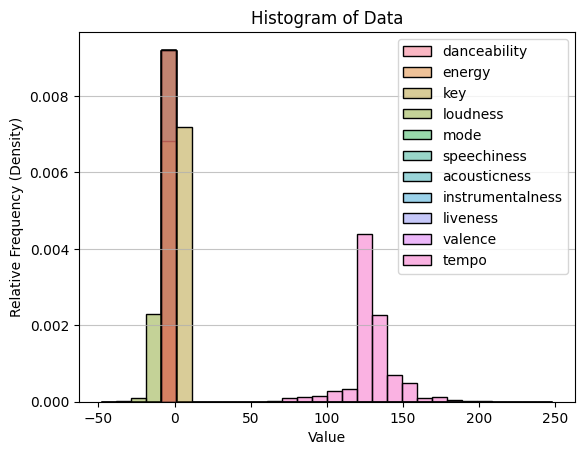

In [465]:
sns.histplot(data=df, bins=30, stat='density')
plt.xlabel('Value')
plt.ylabel('Relative Frequency (Density)')
plt.title('Histogram of Data')
plt.grid(axis='y', alpha=0.75)
plt.show()

### **Feature Engineering**

**Categorical and numerical columns dataframes**

In [466]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

df_categorical_data = df[categorical_columns]
df_numerical_data = df[numerical_columns]

**Examining Correlation on numerical columns**

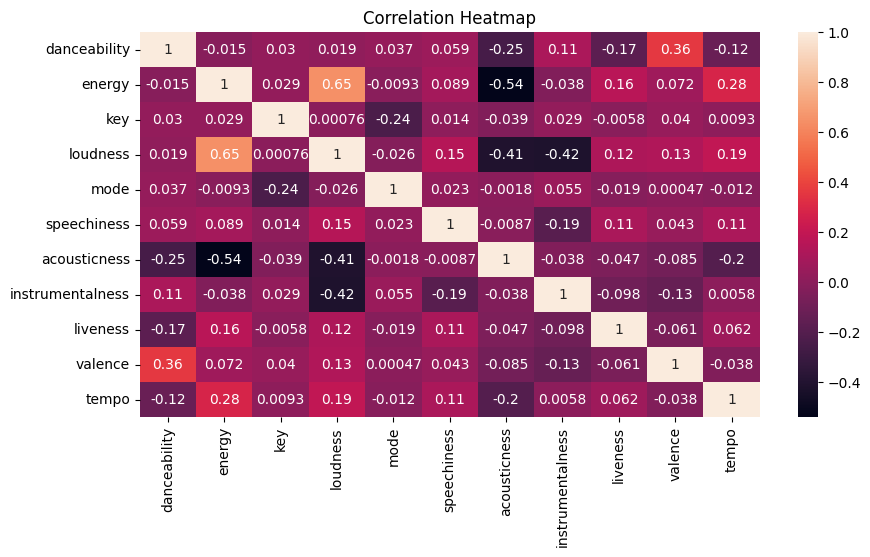

In [467]:
df_numerical_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(df_numerical_data.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

**Analyzing Correlation:**

*   Stronger Correlations features seems to Energy, Liveness, Loudness, Valence
*   Weaker Correlations features seems to be Acousticness, instrumentalness





**Examining Covariance on numerical columns**

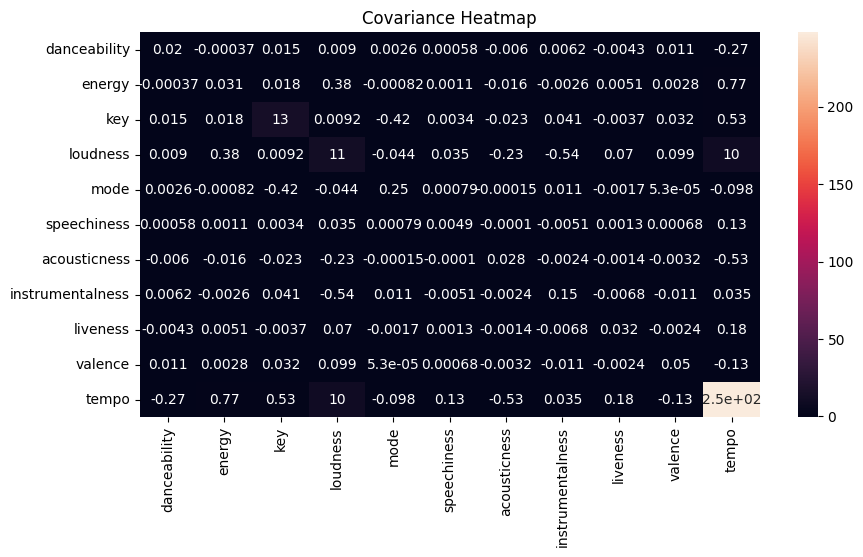

In [468]:
df_numerical_data.cov()
plt.figure(figsize=(10, 5))
sns.heatmap(df_numerical_data.cov(), annot = True)
plt.title('Covariance Heatmap')
plt.show()

**Analyzing Covariance:**
*   Most of the variables shows darker in shade so challenging to identify strong and weak.
*   Diagonaly values show perfect covariance like key, loudness
*   Tempo seems to be least or outlier here.

### **Baseline Model**

In [469]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import make_classification
# Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier with the 'stratified' strategy
dummy_clf = DummyClassifier(strategy='stratified')

# Fit the classifier to the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dummy_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Dummy Classifier Accuracy: {accuracy}")

Dummy Classifier Accuracy: 0.505


### **Generate Sample Data for Models Evaluation**

In [470]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Create the results DataFrame for comparison of models later
results = []
results_df = pd.DataFrame(results, columns=['Model','Silhouette Score', 'Rand Index',
                                            'Adjusted Rand Index', 'Mutual Information',
                                            'Normalized Mutual Information'])

### **KMeans Model Evaluation**

In [471]:
# Train K-means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Evaluate the model
silhouette = silhouette_score(X, cluster_labels)
rand = rand_score(y, cluster_labels)
adjusted_rand = adjusted_rand_score(y, cluster_labels)
mutual_info = mutual_info_score(y, cluster_labels)
normalized_mutual_info = normalized_mutual_info_score(y, cluster_labels)

# Add result to dataframe
results_df.loc[0] = ['KMeans', silhouette, rand, adjusted_rand, mutual_info, normalized_mutual_info]

### **DBScan Model Evaluation**

In [472]:
# Train DBScan model
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Evaluate the model
silhouette = silhouette_score(X, labels)
rand = rand_score(y, labels)
adjusted_rand = adjusted_rand_score(y, labels)
mutual_info = mutual_info_score(y, labels)
normalized_mutual_info = normalized_mutual_info_score(y, labels)

# Add result to dataframe
results_df.loc[1] = ['DBScan', silhouette, rand, adjusted_rand, mutual_info, normalized_mutual_info]

### **Model Scores Comparison**

**Comparing Models Scores**

In [473]:
results_df.set_index('Model', inplace=True)
results_df

,Silhouette Score,Rand Index,Adjusted Rand Index,Mutual Information,Normalized Mutual Information
Model,,,,,
KMeans,0.848030,1.000000,1.000000,1.098612,1.000000
DBScan,0.250268,0.867157,0.677147,0.910551,0.702045


**Visualizing Models Scores**

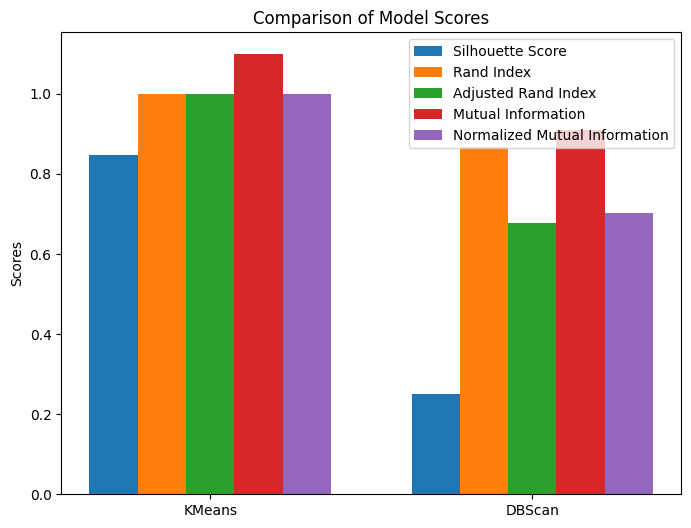

In [474]:
results_df = results_df.reset_index()
models = results_df['Model']
silhouettes = results_df['Silhouette Score']
rands = results_df['Rand Index']
adjusted_rands = results_df['Adjusted Rand Index']
mutual_infos = results_df['Mutual Information']
normalized_mutual_infos = results_df['Normalized Mutual Information']

x = np.arange(len(models))
width = 0.15

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x, silhouettes, width, label='Silhouette Score')
rects2 = ax.bar(x + width, rands, width, label='Rand Index')
rects3 = ax.bar(x + 2*width, adjusted_rands, width, label='Adjusted Rand Index')
rects4 = ax.bar(x + 3*width, mutual_infos, width, label='Mutual Information')
rects5 = ax.bar(x + 4*width, normalized_mutual_infos, width, label='Normalized Mutual Information')

ax.set_xticks(x + 2*width)
ax.set_xticklabels(models)
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Scores')
ax.legend()
plt.show()

**Analyzing model scores:**
*   Looking at all the scores, KMeans seems to be more suitable for given dataset.
*   However, applying DBScan model may show better performing output.

### **Selecting track from dataset**

**Selecting track from dataset assuming its currently played track**

**Let's pick a track that is NOT available in dataset**

In [475]:
current_song_name = 'Some unknown song'
result = df.query('track_name == @current_song_name')[numerical_columns].to_numpy()
if result.size == 0:
  print("No songs found in the dataset")
else:
  current_song_index = df[df['track_name'] == current_song_name].index[0]
  print(f'Current track name is: {current_song_name}')
  print(f'Current track index is: {current_song_index}')

No songs found in the dataset


**Let's pick a random track from dataset**

In [476]:
current_song_name = df['track_name'].sample(n=1).iloc[0]
result = df.query('track_name == @current_song_name')[numerical_columns].to_numpy()
if result.size == 0:
  print("No songs found in the dataset")
else:
  current_song_index = df[df['track_name'] == current_song_name].index[0]
  print(f'Current track name is: {current_song_name}')
  print(f'Current track index is: {current_song_index}')

Current track name is: Blur
Current track index is: 11139


### **Applying KMeans Model**

**Model Training**

In [477]:
df_num_x = df_numerical_data.to_numpy()
kmeans = KMeans(n_clusters=500, init='k-means++', max_iter=300, n_init='auto', random_state=42)
kmeans.fit(df_num_x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

**Visualizing Data Clusters**

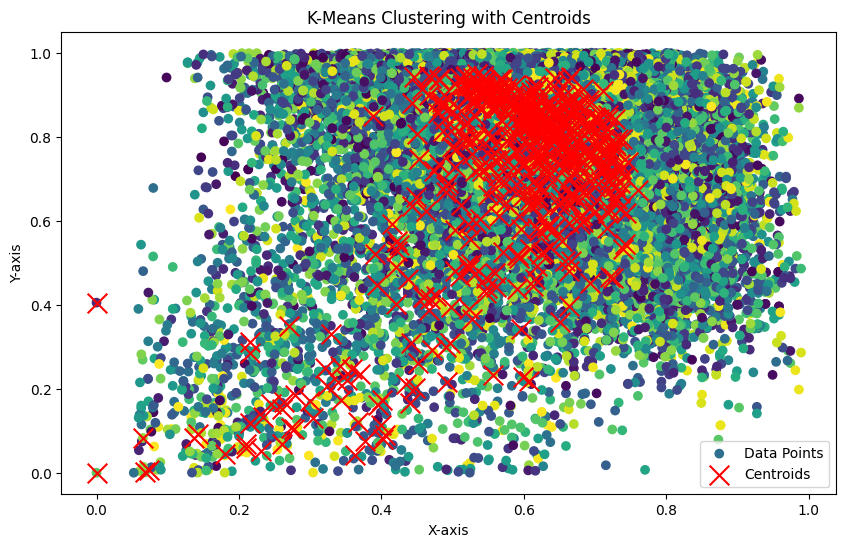

In [478]:
plt.figure(figsize=(10, 6))
plt.scatter(df_num_x[:, 0], df_num_x[:, 1], c=labels, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

### **KMeans for recommendation**

**Predicting cluster of selected track**

In [479]:
predicted_clusters = kmeans.predict(result)
print("Predicted Clusters for New Data:", predicted_clusters)

Predicted Clusters for New Data: [134]


**Find the nearest element to the centroid of cluster using Euclidean norm**

In [480]:
cluster_index = predicted_clusters[0]
cluster_points = df_num_x[labels == cluster_index]
cluster_centroid = centroids[cluster_index]
distances = np.linalg.norm(cluster_points - cluster_centroid, axis=1)

# Find the index of the nearest point
nearest_index = np.argmin(distances)

# Print the nearest point
print(f"Nearest point to cluster {cluster_index} centroid: {cluster_points[nearest_index]}")

Nearest point to cluster 134 centroid: [ 6.77e-01  7.95e-01  7.00e+00 -8.92e+00  1.00e+00  4.19e-02  7.51e-02
  8.48e-01  8.37e-02  5.21e-01  1.22e+02]


**Track recommendataion by matching identified point**

In [481]:
match = (df[numerical_columns] == cluster_points[nearest_index].tolist()).all(axis=1)
similar_track_name = df[match].iloc[0]['track_name']
similar_track_index = df[df['track_name'] == similar_track_name].index[0]
print(f'Similar track name found is: {similar_track_name}')
print(f'Similar track index found is: {similar_track_index}')

Similar track name found is: House Some
Similar track index found is: 5538


**Let's look at both tracks dataframe results**

In [482]:
df_similar_tracks = df.loc[[current_song_index, similar_track_index]]
df_similar_tracks

,track_name,artists_names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_name,genres,artist_name
11139,Blur,['Blank & Jones'],0.697,0.804,6,-8.86,0,0.0511,0.000485,0.785,0.1110,0.169,122.0,#WhatWeDoAtNight 2,"['german techno', 'trance']",BLANK & JONES
5538,House Some,"['Sander Kleinenberg', 'Boris Smith']",0.677,0.795,7,-8.92,1,0.0419,0.075100,0.848,0.0837,0.521,122.0,House Some,['dutch edm'],SANDER KLEINENBERG


**Visualizing data points of tracks marked as x**

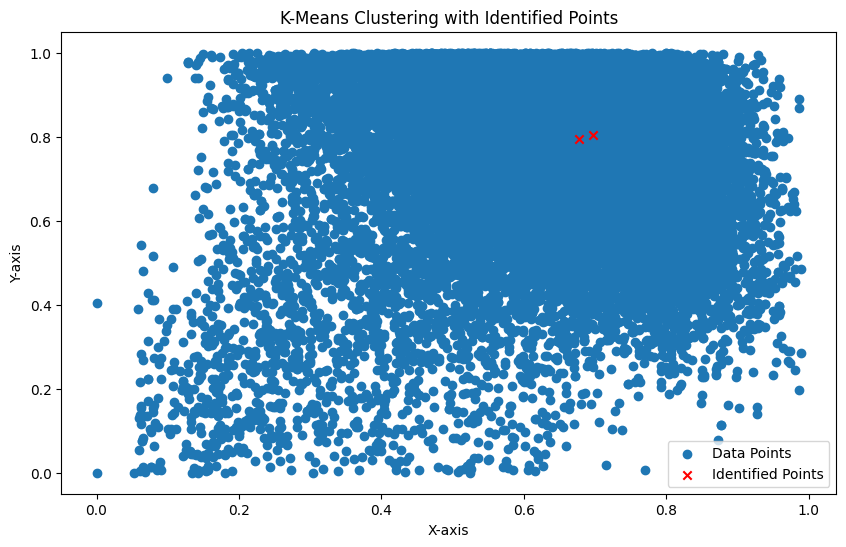

In [483]:
df_num_x1 = df_similar_tracks[numerical_columns].to_numpy()
plt.figure(figsize=(10, 6))
plt.scatter(df_num_x[:, 0], df_num_x[:, 1], marker='o', label='Data Points')
plt.scatter(df_num_x1[:, 0], df_num_x1[:, 1], marker='x', color='red', label='Identified Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Means Clustering with Identified Points')
plt.legend()
plt.show()

### **Cosine Similarity**

**Calculate Average Cosine similarity between tracks**

In [484]:
def get_avg_cosine_similarity_df(df_similar_tracks_num):
  similarity_matrix = cosine_similarity(df_similar_tracks_num)
  similarity_matrix = similarity_matrix[~np.eye(similarity_matrix.shape[0],dtype=bool)].reshape(similarity_matrix.shape[0],-1)
  average_similarity = np.mean(similarity_matrix)
  print(f'Average Cosine Similarity is: {average_similarity}')

get_avg_cosine_similarity_df(df_similar_tracks[numerical_columns])

Average Cosine Similarity is: 0.9999288906029032


**Heatmap visualization of Cosine Similarity Matrix**

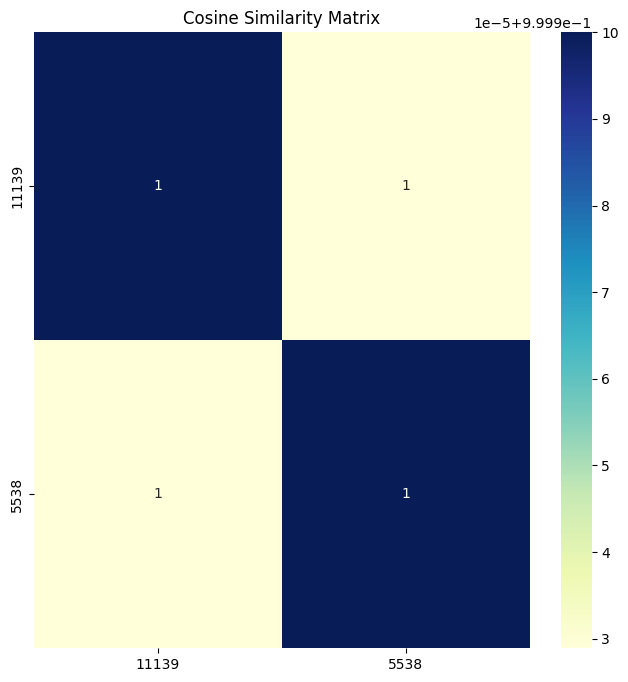

In [485]:
def show_cosine_matrix_df(df_similar_tracks_num):
  similarity_array = cosine_similarity(df_similar_tracks_num)
  similarity = pd.DataFrame(similarity_array, index=df_similar_tracks_num.index, columns=df_similar_tracks_num.index)
  plt.figure(figsize=(8, 8))
  sns.heatmap(similarity_array, annot=True, cmap='YlGnBu', xticklabels=df_similar_tracks_num.index, yticklabels=df_similar_tracks_num.index)
  plt.title('Cosine Similarity Matrix')
  plt.show()

show_cosine_matrix_df(df_similar_tracks[numerical_columns])

### **Summary of findings and suggestions:**

*   KMeans model performed very well on the dataset to produce actual results compared to expected output.
*   Frequent training and modeling may produce better result with optimal resources to compute data.
*   KMeans can efficiently handle large datasets due to its linear time complexity.
*   TensorFlow and GNN deep learning could also be used for this purpose.
*   A more balanced dataset could have been better.
*   Downside is it only worked for numerical data.
*   KMeans assumes that clusters are roughly the same size, which is not always the case.

